In [1]:
from google.colab import files
files.upload()  # Upload your `kaggle.json` file here


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"jahanvigupta180","key":"47b45c3faedfd55695e52870fbd4a032"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# **Step 0: Import All Required Libraries**

In [3]:
# 📊 Data Handling
import pandas as pd
import numpy as np

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 📅 Date/Time
from datetime import datetime

# 📂 File/OS (optional for saving or handling files)
import os

# 🛠️ Display Settings (Optional: makes output clearer)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


# **1. Load & Prepare Data**

In [4]:
# 🧹 Step 1: Clean old files
!rm -f /content/articles.csv /content/articles.csv.zip
!rm -f /content/transactions_train.csv /content/transactions_train.csv.zip

# 📥 Step 2: Download fresh files from Kaggle
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f articles.csv --force
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -f transactions_train.csv --force

# 🏷️ Step 3: Rename them correctly as ZIP files
!mv /content/articles.csv /content/articles.csv.zip
!mv /content/transactions_train.csv /content/transactions_train.csv.zip

# 📦 Step 4: Unzip the files
!unzip -o /content/articles.csv.zip
!unzip -o /content/transactions_train.csv.zip


  0% 0.00/4.26M [00:00<?, ?B/s]
100% 4.26M/4.26M [00:00<00:00, 558MB/s]
 99% 577M/584M [00:01<00:00, 277MB/s]
100% 584M/584M [00:01<00:00, 371MB/s]
Archive:  /content/articles.csv.zip
  inflating: articles.csv            
Archive:  /content/transactions_train.csv.zip
  inflating: transactions_train.csv  


In [5]:
import pandas as pd

# Load both datasets using the safe encoding
articles = pd.read_csv("/content/articles.csv", encoding="latin1")
transactions = pd.read_csv("/content/transactions_train.csv", encoding="latin1", low_memory=False)

# Quick check
print("✅ Articles shape:", articles.shape)
print("✅ Transactions shape:", transactions.shape)


✅ Articles shape: (105542, 25)
✅ Transactions shape: (31788324, 5)


# **2. Data Preprocessing**

In [92]:
# Only if df, articles, or transactions got cleared
articles = pd.read_csv("/content/articles.csv")
transactions = pd.read_csv("/content/transactions_train.csv", nrows=15_000_000)

transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
df = transactions.merge(articles, on='article_id', how='left')
df['year'] = df['t_dat'].dt.year
df['week'] = df['t_dat'].dt.isocalendar().week
df['month'] = df['t_dat'].dt.month


# ✅ Confirm results
print("🎯 Preprocessing complete. Here's what the data looks like:")
display(df.head())


🎯 Preprocessing complete. Here's what the data looks like:


,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,year,week,month
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1338,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",2018,38,9
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,541518,Rae Push (Melbourne) 2p,306,Bra,Underwear,1010016,Solid,51,Light Pink,1,Dusty Light,4,Pink,1334,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",2018,38,9
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,505221,Inca Jumper,252,Sweater,Garment Upper body,1010010,Melange,52,Pink,2,Medium Dusty,4,Pink,5963,Tops Knitwear DS,D,Divided,2,Divided,58,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,2018,38,9
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,Melange,52,Pink,7,Medium,4,Pink,3090,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...,2018,38,9
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,1010010,Melange,93,Dark Green,4,Dark,19,Green,3090,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...,2018,38,9


# **3. Weekly Demand + Rolling Average Detection**

# **Deadstock Identification**


*   Define a "deadstock" product as one with <10 average units sold over the last 3 weeks.




In [93]:
# 📦 DEADSTOCK DETECTION

# Group weekly sales
weekly_sales = df.groupby(['article_id', 'year', 'week'])['price'].count().reset_index()
weekly_sales.rename(columns={'price': 'units_sold'}, inplace=True)

# Pivot to SKU × Week matrix
sku_week_pivot = weekly_sales.pivot_table(
    index='article_id',
    columns=['year', 'week'],
    values='units_sold',
    fill_value=0
)

weekly_sales = df.groupby(['article_id', 'year', 'week'])['price'].count().reset_index()
weekly_sales.rename(columns={'price': 'units_sold'}, inplace=True)

sku_week_pivot = weekly_sales.pivot_table(index='article_id', columns=['year', 'week'], values='units_sold', fill_value=0)
sku_week_ma = sku_week_pivot.T.rolling(window=2).mean().T

sku_summary = pd.DataFrame()
sku_summary['article_id'] = sku_week_pivot.index
sku_summary['2_week_avg'] = sku_week_ma.iloc[:, -2:].mean(axis=1).values
sku_summary['is_deadstock'] = sku_summary['2_week_avg'] < 5

sku_summary.head()


# ✅ Deadstock Stats
print("✅ Updated deadstock count:")
print(sku_summary['is_deadstock'].value_counts())

# 🧾 Show few SKUs flagged
display(sku_summary[sku_summary['is_deadstock']].head())


✅ Updated deadstock count:
is_deadstock
True     54379
False    11319
Name: count, dtype: int64


,article_id,2_week_avg,is_deadstock
2,108775051,0.0,True
4,110065002,1.5,True
7,111565003,0.0,True
11,112679048,0.0,True
12,112679052,0.0,True


# **Product Age Estimation + Markdown Simulation**

---



In [111]:
# 📌 5. Product Age Estimation + Markdown Simulation

# ✅ Step 1: Find latest sale date per SKU
latest_sale = df.groupby('article_id')['t_dat'].max().reset_index()
latest_sale.columns = ['article_id', 'last_sold_date']

# ✅ Step 2: Calculate weeks since last sold
last_transaction_date = df['t_dat'].max()
latest_sale['weeks_since_sold'] = ((last_transaction_date - latest_sale['last_sold_date']).dt.days) // 7

# ✅ Step 3: Remove old weeks_since_sold column if exists
if 'weeks_since_sold' in sku_summary.columns:
    sku_summary.drop(columns=['weeks_since_sold'], inplace=True)

# ✅ Step 4: Merge this info into sku_summary
sku_summary = sku_summary.merge(latest_sale[['article_id', 'weeks_since_sold']], on='article_id', how='left')

# ✅ Step 5: Recommend markdowns
# Rule: Deadstock AND not sold in 8+ weeks
sku_summary['recommend_markdown'] = (sku_summary['is_deadstock']) & (sku_summary['weeks_since_sold'] >= 8)

# ✅ Final markdown stats
print("🧾 Recommended for Markdown:")
print(sku_summary['recommend_markdown'].value_counts())

# 🔍 Sample markdown SKUs
display(sku_summary[sku_summary['recommend_markdown']].head())


🧾 Recommended for Markdown:
recommend_markdown
False    37824
True     27874
Name: count, dtype: int64


,article_id,2_week_avg,is_deadstock,weeks_since_sold_x,recommend_markdown,action,weeks_since_sold_y,weeks_since_sold
7,111565003,0.0,True,25,True,Discard / Donate,25,25
12,112679052,0.0,True,31,True,Discard / Donate,31,31
13,114428026,0.0,True,18,True,Discard / Donate,18,18
16,118458003,0.0,True,13,True,Discard / Donate,13,13
20,118458034,0.0,True,38,True,Discard / Donate,38,38


# **6. Visualizations**

# **Weekly Sales Plot for Markdown SKUs**

In [112]:
import plotly.express as px

# Filter top 10 markdown SKUs based on total units sold
top_skus = weekly_sales[weekly_sales['article_id'].isin(
    sku_summary[sku_summary['recommend_markdown']]['article_id']
)]
top_skus_sum = top_skus.groupby('article_id')['units_sold'].sum().nlargest(10).index.tolist()

# Filter again to only top SKUs
plot_df = weekly_sales[weekly_sales['article_id'].isin(top_skus_sum)]

# Line chart with hover
fig = px.line(
    plot_df,
    x="week",
    y="units_sold",
    color="article_id",
    title="📉 Weekly Sales Trends of Top 10 Markdown SKUs",
    labels={"units_sold": "Units Sold", "week": "Week"}
)
fig.update_traces(mode='lines+markers')
fig.show()


# **Bar Chart: Product Types with Most Deadstock**

/tmp/ipython-input-113-3954108207.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-113-3954108207.py:14: UserWarning:

Glyph 129530 (\N{BASKET}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129530 (\N{BASKET}) missing from font(s) DejaVu Sans.



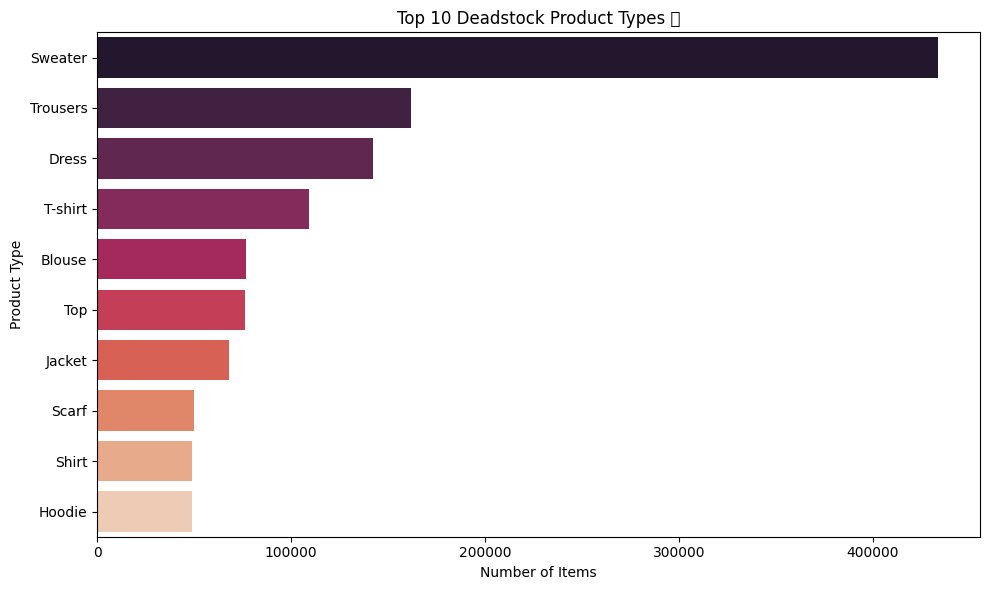

In [113]:
import seaborn as sns

# Merge product type names with deadstock items
deadstock_df = df[df['article_id'].isin(
    sku_summary[sku_summary['recommend_markdown']]['article_id']
)]
top_types = deadstock_df['product_type_name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_types.values, y=top_types.index, palette="rocket")
plt.title("Top 10 Deadstock Product Types 🧺")
plt.xlabel("Number of Items")
plt.ylabel("Product Type")
plt.tight_layout()
plt.show()


# **Heatmap: Weekly Sales for Top Deadstock SKUs**

/tmp/ipython-input-101-4000458971.py:10: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



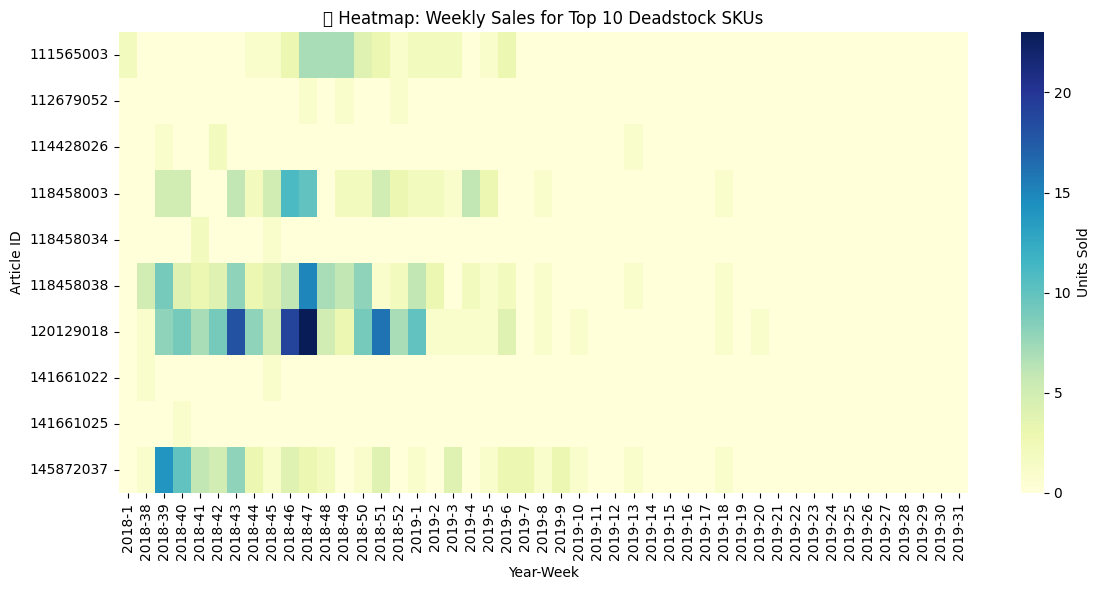

In [101]:
# Select top 10 markdown SKUs
top_heatmap_skus = sku_summary[sku_summary['recommend_markdown']].head(10)['article_id'].tolist()
heatmap_df = sku_week_pivot.loc[top_heatmap_skus]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, cmap="YlGnBu", cbar_kws={'label': 'Units Sold'})
plt.title("🔥 Heatmap: Weekly Sales for Top 10 Deadstock SKUs")
plt.xlabel("Year-Week")
plt.ylabel("Article ID")
plt.tight_layout()
plt.show()


# **Forecast Sales for Top 1 Deadstock SKU**

/tmp/ipython-input-102-3286883741.py:31: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



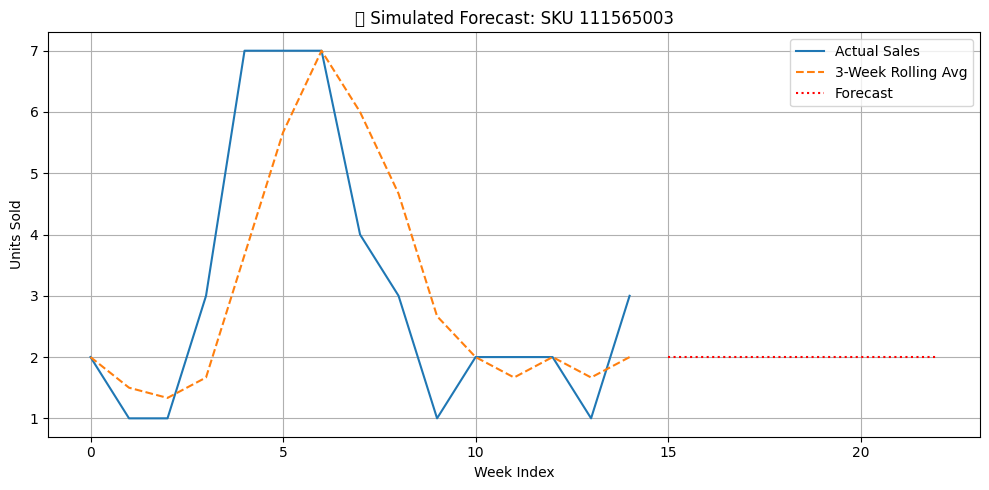

In [102]:
# Pick a markdown SKU
sample_sku = sku_summary[sku_summary['recommend_markdown']]['article_id'].iloc[0]

# Weekly sales data
sku_data = weekly_sales[weekly_sales['article_id'] == sample_sku].sort_values(['year', 'week'])

# Convert year & week to a pseudo-date index
sku_data['week_id'] = range(len(sku_data))

# Rolling avg (simulated forecast)
sku_data['rolling_avg'] = sku_data['units_sold'].rolling(window=3, min_periods=1).mean()

# Simulate forecast: extend trend by last known average
forecast_weeks = 8
last_avg = sku_data['rolling_avg'].iloc[-1]
future_weeks = pd.DataFrame({
    'week_id': range(sku_data['week_id'].max() + 1, sku_data['week_id'].max() + 1 + forecast_weeks),
    'forecast_units': [last_avg] * forecast_weeks
})

# Plot actual vs. forecast
plt.figure(figsize=(10, 5))
plt.plot(sku_data['week_id'], sku_data['units_sold'], label="Actual Sales")
plt.plot(sku_data['week_id'], sku_data['rolling_avg'], label="3-Week Rolling Avg", linestyle='--')
plt.plot(future_weeks['week_id'], future_weeks['forecast_units'], label="Forecast", linestyle=':', color='red')
plt.title(f"📉 Simulated Forecast: SKU {sample_sku}")
plt.xlabel("Week Index")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [114]:
def decide_action(row):
    if not row['is_deadstock']:
        return 'Continue Normal Sale'
    if row['weeks_since_sold'] > 8:
        return 'Discard / Donate'
    elif row['weeks_since_sold'] >= 4:
        return 'Heavy Markdown'
    else:
        return 'Hold & Monitor'

sku_summary['action'] = sku_summary.apply(decide_action, axis=1)
decision_table = sku_summary[['article_id', '2_week_avg', 'is_deadstock', 'weeks_since_sold', 'action']]
display(decision_table.head(10))


,article_id,2_week_avg,is_deadstock,weeks_since_sold,action
0,108775015,10.00,False,0,Continue Normal Sale
1,108775044,19.00,False,0,Continue Normal Sale
2,108775051,0.00,True,5,Heavy Markdown
3,110065001,10.00,False,0,Continue Normal Sale
4,110065002,1.50,True,0,Hold & Monitor
5,110065011,9.75,False,0,Continue Normal Sale
6,111565001,9.75,False,0,Continue Normal Sale
7,111565003,0.00,True,25,Discard / Donate
8,111586001,9.00,False,0,Continue Normal Sale
9,111593001,31.25,False,0,Continue Normal Sale


/tmp/ipython-input-115-3061022615.py:6: UserWarning:

Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.



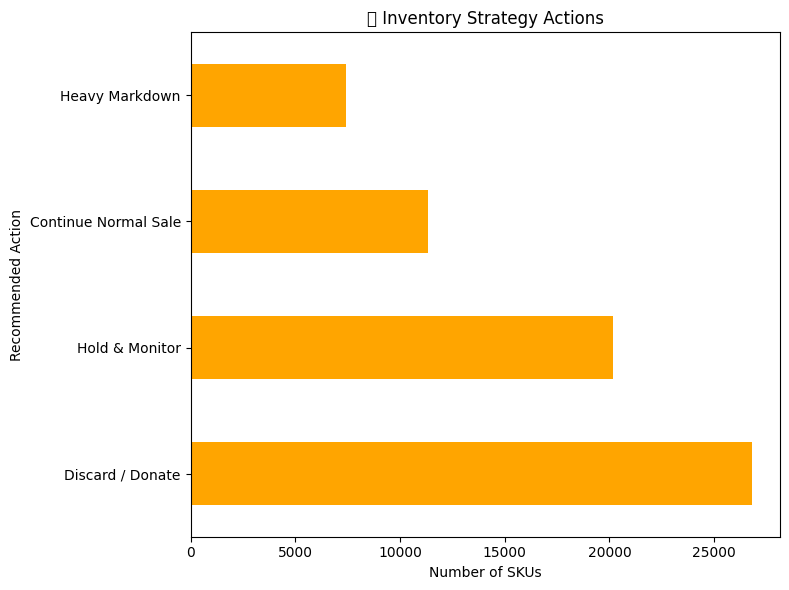

In [115]:
plt.figure(figsize=(8,6))
sku_summary['action'].value_counts().plot(kind='barh', color='orange')
plt.title("🧾 Inventory Strategy Actions")
plt.xlabel("Number of SKUs")
plt.ylabel("Recommended Action")
plt.tight_layout()
plt.show()


In [119]:
print("📈 DATA SUMMARY")
print(f"- Total SKUs analyzed: {sku_summary.shape[0]}")
print(f"- Deadstock SKUs (low sales): {sku_summary['is_deadstock'].sum()}")
print(f"- SKUs with no sales in 8+ weeks: {(sku_summary['weeks_since_sold'] >= 8).sum()}")
print(f"- SKUs recommended for markdown: {sku_summary['recommend_markdown'].sum()}")

print("\n🔍 Deadstock Rate by Product Type (Top 10):")
top_deadstock_types = (
    df[df['article_id'].isin(sku_summary[sku_summary['is_deadstock']]['article_id'])]
    .groupby('product_type_name')
    .size()
    .sort_values(ascending=False)
    .head(10)
)
display(top_deadstock_types)

print("\n📋 Inventory Action Decision Breakdown:")
action_summary = sku_summary['action'].value_counts()
display(action_summary)

print("\n🧾 Sample SKUs by Action:")
for act in action_summary.index:
    print(f"\n➡️ Action: {act}")
    sample = sku_summary[sku_summary['action'] == act].head(3)
    display(sample[['article_id', '2_week_avg', 'weeks_since_sold', 'action']])


📈 DATA SUMMARY
- Total SKUs analyzed: 65698
- Deadstock SKUs (low sales): 54379
- SKUs with no sales in 8+ weeks: 27874
- SKUs recommended for markdown: 27874

🔍 Deadstock Rate by Product Type (Top 10):


,0
product_type_name,
Sweater,1068052
Trousers,871674
Dress,565354
T-shirt,439397
Blouse,356279
Top,302280
Bra,231458
Jacket,222639
Underwear bottom,220835



📋 Inventory Action Decision Breakdown:


,count
action,
Discard / Donate,27874
Hold & Monitor,20165
Continue Normal Sale,11319
Heavy Markdown,6340



🧾 Sample SKUs by Action:

➡️ Action: Discard / Donate


,article_id,2_week_avg,weeks_since_sold,action
7,111565003,0.0,25,Discard / Donate
12,112679052,0.0,31,Discard / Donate
13,114428026,0.0,18,Discard / Donate



➡️ Action: Hold & Monitor


,article_id,2_week_avg,weeks_since_sold,action
4,110065002,1.5,0,Hold & Monitor
14,114428030,2.0,0,Hold & Monitor
15,116379047,0.5,1,Hold & Monitor



➡️ Action: Continue Normal Sale


,article_id,2_week_avg,weeks_since_sold,action
0,108775015,10.0,0,Continue Normal Sale
1,108775044,19.0,0,Continue Normal Sale
3,110065001,10.0,0,Continue Normal Sale



➡️ Action: Heavy Markdown


,article_id,2_week_avg,weeks_since_sold,action
2,108775051,0.0,5,Heavy Markdown
11,112679048,0.0,5,Heavy Markdown
17,118458004,0.0,4,Heavy Markdown


In [121]:
sku_summary.to_csv("inventory_decision_table.csv", index=False)
df[df['article_id'].isin(sku_summary[sku_summary['is_deadstock']]['article_id'])] \
  .to_csv("deadstock_details.csv", index=False)